# <center><a href='https://colab.research.google.com/github/fortierq/itc1/blob/master/files/5_graph/3_traversal/dfs/code_dfs.ipynb'>Code : Parcours en profondeur <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

## Graphe de test

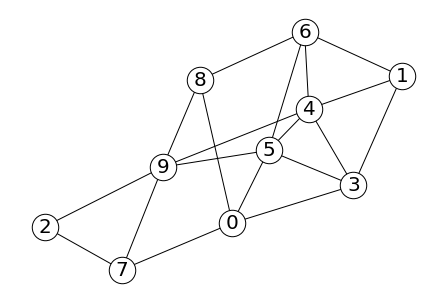

In [1]:
import networkx as nx

options = {"font_size": 20, "node_size": 700, "edgecolors": "black"}
G = nx.fast_gnp_random_graph(10, 0.35)
nx.draw(G, with_labels=True, node_color="white", **options)

## DFS avec fonction récursive

In [2]:
def dfs(G, s):
    visited = [False]*len(G)
    def aux(u):
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                aux(v)
    aux(s)

dfs(G, 0) # affichage des sommets dans un ordre de parcours en profondeur

0 3 1 4 5 6 8 9 2 7 

### DFS avec pile

In [8]:
def dfs(G, s):
    visited = [False]*len(G)
    pile = [s]
    while len(pile) > 0:
        u = pile.pop()
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                pile.append(v)

dfs(G, 0)

0 8 4 1 6 3 9 7 5 2 

## Animation du DFS

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_traversal(G, traversal):
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    t = traversal(G)
    colors, widths = t[0], t[1]
    fig, ax = plt.subplots(figsize=(16,10))
    pos = nx.spring_layout(G)
    plt.close()
    def update(frame):
        ax.clear()
        nx.draw(G, pos, ax, width=widths[frame], node_color=colors[frame], **options)
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(colors), interval=800, repeat=True)
    return HTML(ani.to_jshtml())

In [45]:
def dfs(G):
    colors, widths = ['black']*len(G), [1]*len(G.edges)
    frame_colors, frame_widths = [], []
    def add_frame():
        frame_colors.append(colors.copy())
        frame_widths.append(widths.copy())
    def aux(u):
        colors[u] = 'red'
        add_frame()
        for v in G.neighbors(u):
            if colors[v] == 'black':
                colors[u] = 'orange'
                widths[G[u][v]['index']] = 5
                aux(v)
                colors[u] = 'red'
                add_frame()
        colors[u] = 'green'
        add_frame()
    aux(0)
    return frame_colors, frame_widths

In [46]:
anim_traversal(G, dfs)